# Importing package and data

In [82]:
import pandas as pd
import numpy as np

import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

The data come in several csv files. Each file is a category of product. We will concatenat them and add a new column for the category. The category name are in the files name.

In [83]:
# creating a list for all the csv files
dataframes = []

# create a dataframe from each csv file
for file in os.listdir("/content/drive/MyDrive/DA_Portfolio/Data cleaning/data"):
  df = pd.read_csv(f"/content/drive/MyDrive/DA_Portfolio/Data cleaning/data/{file}")

  # create the category column for each dataframe

  # regex to extract the category in the file name
  match = re.search(r'us-shein-(.*?)-\d+\.csv', file)

  # check if there is a match
  if match:
    category = match.group(1)
    df["category"] = category

  #add the dataframe to the list
  dataframes.append(df)

In [84]:
# concatenat all the dataframes in the list
df = pd.concat(dataframes, ignore_index=True)
df.shape

(82105, 13)

In [85]:
df.head()

,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count,product-locatelabels-img src,blackfridaybelts-bg src,blackfridaybelts-content
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,https://us.shein.com/1pc-Rechargeable-Deep-Tis...,#1 Best Sellers,in Give Gifts,$2.03,-22%,NaN,NaN,appliances,NaN,NaN,NaN,NaN
1,1pc Portable Hanging Neck Fan,https://us.shein.com/1pc-Portable-Hanging-Neck...,#4 Best Sellers,in Top rated in Portable Fans,$6.48,-20%,NaN,NaN,appliances,NaN,NaN,NaN,NaN
2,1pc Pink Colored Curved Eyelash Curler False E...,https://us.shein.com/1pc-Pink-Colored-Curved-E...,NaN,NaN,$1.80,NaN,400+ sold recently,NaN,appliances,NaN,NaN,NaN,NaN
3,1 Mini Portable Handheld Fan With 2 Aa Batteri...,https://us.shein.com/1-Mini-Portable-Handheld-...,NaN,NaN,$0.88,-72%,5.6k+ sold recently,NaN,appliances,NaN,NaN,NaN,NaN
4,"Wit Water Flosser,Portable Oral Irrigator With...",https://us.shein.com/Wit-Water-Flosser-Portabl...,#6 Best Sellers,in Oral Irrigators,$12.06,-40%,NaN,NaN,appliances,NaN,NaN,NaN,NaN


# NA

In [86]:
# Display pourcentage of NA
df.isna().sum()/len(df)*100

,0
goods-title-link--jump,99.191279
goods-title-link--jump href,99.191279
rank-title,82.211802
rank-sub,82.211802
price,0.002436
discount,33.040619
selling_proposition,33.787224
goods-title-link,0.825772
category,0.000000
color-count,75.953961


## link and image columns

We will drop the column with link or image because we cannot replace them properly except the column "goods-title-link because it as a low pourcentage of NA"

In [87]:
col = ["goods-title-link--jump", "goods-title-link--jump href", "product-locatelabels-img src", "blackfridaybelts-bg src"]
df.drop(col, axis=1, inplace=True)

In [88]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count,blackfridaybelts-content
0,#1 Best Sellers,in Give Gifts,$2.03,-22%,NaN,NaN,appliances,NaN,NaN
1,#4 Best Sellers,in Top rated in Portable Fans,$6.48,-20%,NaN,NaN,appliances,NaN,NaN
2,NaN,NaN,$1.80,NaN,400+ sold recently,NaN,appliances,NaN,NaN
3,NaN,NaN,$0.88,-72%,5.6k+ sold recently,NaN,appliances,NaN,NaN
4,#6 Best Sellers,in Oral Irrigators,$12.06,-40%,NaN,NaN,appliances,NaN,NaN


## Rank columns

We will assume that if there is a NA it is because the product is not ranked high enough to be mentionned. So we will replace the NA by 0 and "Not ranked"

In [89]:
df["rank-title"].fillna("0", inplace=True)
df["rank-sub"].fillna("Not ranked", inplace=True)

In [90]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count,blackfridaybelts-content
0,#1 Best Sellers,in Give Gifts,$2.03,-22%,NaN,NaN,appliances,NaN,NaN
1,#4 Best Sellers,in Top rated in Portable Fans,$6.48,-20%,NaN,NaN,appliances,NaN,NaN
2,0,Not ranked,$1.80,NaN,400+ sold recently,NaN,appliances,NaN,NaN
3,0,Not ranked,$0.88,-72%,5.6k+ sold recently,NaN,appliances,NaN,NaN
4,#6 Best Sellers,in Oral Irrigators,$12.06,-40%,NaN,NaN,appliances,NaN,NaN


## Price

the pourcentage of NA is very low we will just drop the NA

In [91]:
df.dropna(subset="price", inplace=True)

## Discount

We will assume that if there is no mention of discount it is because there is no discount so we will replace the NAs by 0%

In [92]:
df["discount"].fillna(0, inplace=True)

## Selling proposition

We will assume that if there is no value it is because there is no sell recently. So we will replace the NAs by O

In [93]:
df["selling_proposition"].fillna("0", inplace=True)

## goods title link

The pourcentage of NAs is very low we will just drop them

In [94]:
df.dropna(subset="goods-title-link", inplace=True)

## color-count

We will assume that if the count of color is not specified, it is because there is only one color

In [95]:
df["color-count"].fillna(1, inplace=True)

## blackfridaybelts-content

We will drop the column because the pourcentage of NAs is very high

In [96]:
df.drop("blackfridaybelts-content", axis=1, inplace=True)

In [97]:
df.isna().sum()

,0
rank-title,0
rank-sub,0
price,0
discount,0
selling_proposition,0
goods-title-link,0
category,0
color-count,0


# Duplicates

In [98]:
df.duplicated().sum()

2876

In [99]:
# drop the duplicated based on the name of the product
df.drop_duplicates(subset="goods-title-link", inplace=True)

# Cleaning data


In [100]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
40,#10 Best Sellers,in Other Body Care Machines,$2.70,0,0,4pcs Makeup Sponge Beauty Egg Set - Makeup Spo...,appliances,1.0
41,#1 Best Sellers,in Hair Dryers,$4.38,-32%,0,1pc Salon Tools Black Pink Universal Silicone ...,appliances,1.0
42,#2 Best Sellers,in Electric Nose & Ear Trimmers,$2.86,-25%,0,Portable Lithium Battery Powered Hair Trimmer ...,appliances,1.0
43,#7 Best Sellers,in Juicer & Food Processor,$3.46,-51%,0,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,1.0
44,#7 Best Sellers,in Cleaning Appliance Parts,$2.40,0,0,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,1.0


## Numericals columns

The numericals columns have symboles that should not be there, we will delete them

In [101]:
# defining the columns that need the same cleaning method
num_col = ["price", "discount"]
# replace everything that is not a number or a point by nothing
df[num_col] = df[num_col].replace("[^0-9.]", "", regex=True)

# create a fonction for each column that need a unique method

def clean_rank_title(rank_title):
  # replace "#" and "Best Seller" or "Best Sellers" by nothing using regex
  cleaned_text = re.sub(r'[#]|Best Sellers?', '', rank_title)
  return int(cleaned_text.strip())

def clean_selling_proposition(selling_proposition):
  # replace everything that is not a number, a "k" or a point by nothing
  cleaned_text = re.sub(r'[^0-9.k]', '', selling_proposition)
  # if there is a "k" multiply the value by 1000 while deleting the "k"
  if "k" in cleaned_text:
    return float(cleaned_text.strip()[0:-1]) * 1000
  else:
    return float(cleaned_text.strip())

df["rank-title"] = df["rank-title"].apply(clean_rank_title)
df["selling_proposition"] = df["selling_proposition"].apply(clean_selling_proposition)

In [102]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
40,10,in Other Body Care Machines,2.70,0,0.0,4pcs Makeup Sponge Beauty Egg Set - Makeup Spo...,appliances,1.0
41,1,in Hair Dryers,4.38,32,0.0,1pc Salon Tools Black Pink Universal Silicone ...,appliances,1.0
42,2,in Electric Nose & Ear Trimmers,2.86,25,0.0,Portable Lithium Battery Powered Hair Trimmer ...,appliances,1.0
43,7,in Juicer & Food Processor,3.46,51,0.0,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,1.0
44,7,in Cleaning Appliance Parts,2.40,0,0.0,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,1.0


## Strings columns

The columns with string have unecessary word like "in" and the amount of pcs, we will delete them

In [103]:
# replacing the word "in" by nothing
df["rank-sub"] = df["rank-sub"].replace("in", "", regex=True)

# replacing all the instances of "pc" or "pcs" followed by a number by nothing
df["goods-title-link"] = df["goods-title-link"].replace("[0-9]+pc+s?", "", regex=True)

In [104]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
40,10,Other Body Care Maches,2.70,0,0.0,Makeup Sponge Beauty Egg Set - Makeup Sponge ...,appliances,1.0
41,1,Hair Dryers,4.38,32,0.0,Salon Tools Black Pink Universal Silicone Hai...,appliances,1.0
42,2,Electric Nose & Ear Trimmers,2.86,25,0.0,Portable Lithium Battery Powered Hair Trimmer ...,appliances,1.0
43,7,Juicer & Food Processor,3.46,51,0.0,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,1.0
44,7,Cleang Appliance Parts,2.40,0,0.0,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,1.0


# Changing type

In [105]:
df.dtypes

,0
rank-title,int64
rank-sub,object
price,object
discount,object
selling_proposition,float64
goods-title-link,object
category,object
color-count,float64


In [106]:
int_columns = ["discount", "color-count"]
float_columns = ["price"]

df[int_columns] = df[int_columns].astype(int)
df[float_columns] = df[float_columns].astype(float)

In [107]:
df.dtypes

,0
rank-title,int64
rank-sub,object
price,float64
discount,int64
selling_proposition,float64
goods-title-link,object
category,object
color-count,int64


# Outliers

In [108]:
df.head()

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
40,10,Other Body Care Maches,2.70,0,0.0,Makeup Sponge Beauty Egg Set - Makeup Sponge ...,appliances,1
41,1,Hair Dryers,4.38,32,0.0,Salon Tools Black Pink Universal Silicone Hai...,appliances,1
42,2,Electric Nose & Ear Trimmers,2.86,25,0.0,Portable Lithium Battery Powered Hair Trimmer ...,appliances,1
43,7,Juicer & Food Processor,3.46,51,0.0,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,1
44,7,Cleang Appliance Parts,2.40,0,0.0,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,1


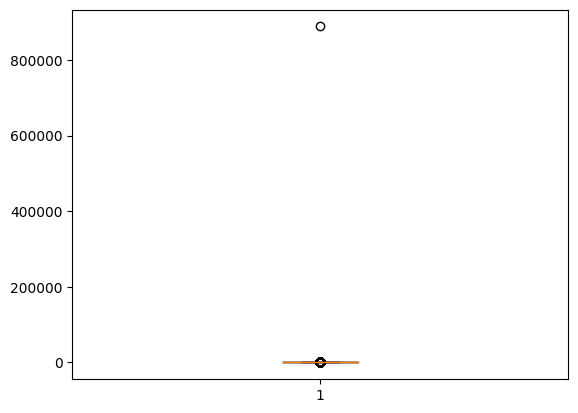

In [109]:
# check the distribution of the prices
plt.boxplot(x="price", data=df);

There is one value that is very far from the other, lets look at it closer

In [110]:
df[df["price"] == df["price"].max()]

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
75742,0,Not ranked,888888.0,0,0.0,This Is A Very Goods Product Name A A A A !!! ...,home_textile,1


Judging by the name I think this row is a mistake. We will delete it

In [111]:
df.drop(75742, inplace=True)

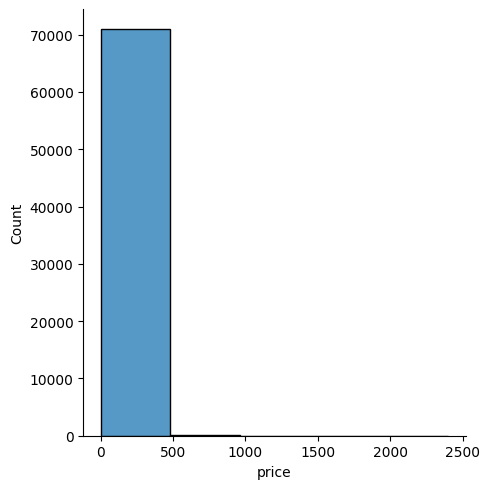

In [112]:
sns.displot(df["price"], bins=5);

In [113]:
df[df["price"] >= 550]

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
1441,0,Not ranked,1430.99,55,0.0,"VEVOR Slushy Machine, 30L Slushie Machine For ...",appliances,1
1959,0,Not ranked,1077.99,56,0.0,"VEVOR Commercial Meatball Forming Machine, 280...",appliances,1
2337,0,Not ranked,683.40,0,0.0,Smeg Smeg | Espresso Machine,appliances,1
2342,0,Not ranked,638.36,0,0.0,Breville Breville | Bambino Plus ThermoJet Esp...,appliances,1
2465,0,Not ranked,714.66,28,0.0,VEVOR Commercial Slushy Machine 15Lx2 Tank Mar...,appliances,1
2469,0,Not ranked,572.53,28,0.0,VEVOR Commercial Slushy Machine 3LX2 Tank Slus...,appliances,1
2537,0,Not ranked,725.75,28,0.0,VEVOR Commercial Electric Meat Bandsaw 2200W S...,appliances,1
2796,8,Massage Chair,584.64,28,0.0,"Massage Chair Recliner With Zero Gravity, Full...",appliances,1
2849,0,Not ranked,2254.99,55,0.0,"VEVOR Commercial Ice Cream Machine, 20-25L/H Y...",appliances,1
2976,4,Massage Chair,839.99,30,0.0,BOSSCARE Full Body Airbag Massage Chair Reclin...,appliances,1


There is a lot of outliers, but I think we can keep them since they seems like valid values. If we have to perform machine learning on the data we will delete them

## Discount

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5e2a4c5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5e2f5eb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5e0ca7940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5e0be0400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5e0c4c1f0>],
 'means': []}

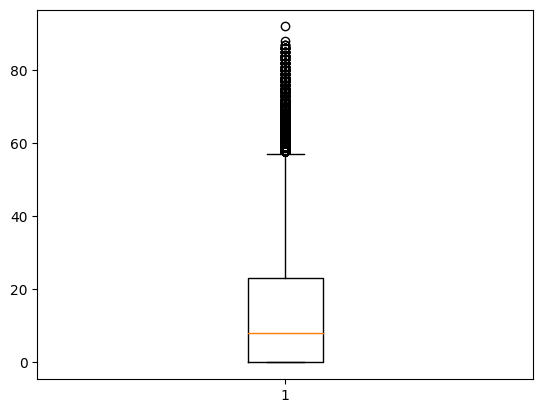

In [114]:
# Check the distribution of the discounts
plt.boxplot(x="discount", data=df)

In [116]:
df[df["discount"] >= 60]

,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,category,color-count
58,0,Not ranked,1.56,71,20.0,"500ml/1000ml Clear Milk Carton Water Bottles,...",appliances,1
75,9,Kitchen Appliance Parts,1.70,60,0.0,1PC/2PCS Quick-Dry Coffee Mat - Large Absorben...,appliances,1
94,0,Not ranked,2.05,69,200.0,"Kitchen Items, Microwave Bacon Maker Microwava...",appliances,1
98,5,Other Household Appliances,1.69,71,0.0,Night Lights Note Board Creative Led Night Lig...,appliances,1
120,0,Not ranked,1.66,70,50.0,Stainless Steel Multi-Layered Scissors For Cho...,appliances,1
...,...,...,...,...,...,...,...,...
81267,0,Not ranked,6.55,61,100.0,SHEIN LUNE Plus Size Printed Lantern Sleeve Dress,curve,1
81270,0,Not ranked,2.91,63,800.0,SHEIN LUNE Plus Striped Cold Shoulder Tee,curve,1
81413,0,Not ranked,8.89,65,100.0,SHEIN Essnce Plus Size Women Loose Fit Solid C...,curve,1
81573,0,Not ranked,8.33,65,200.0,SHEIN Slayr Women's Plus Size Solid Color Hood...,curve,6


There is a lot of outliers, but I think we can keep them since they seems like valid values. If we have to perform machine learning on the data we will delete them

# Rename columns

The names of the columns are inconsistentes some have an underscore some have a dash and the names are not very explicits

In [117]:
df.columns

Index(['rank-title', 'rank-sub', 'price', 'discount', 'selling_proposition',
       'goods-title-link', 'category', 'color-count'],
      dtype='object')

In [118]:
df.rename(columns = {"rank-title" : "Rank", "rank-sub" : "Subcategory_rank", "price" : "Price",
                     "discount" : "Discount", "selling_proposition" : "Recent_sell", "goods-title-link" : "Name",
                     "category" : "Category", "color-count" : "Color_count"}, inplace=True)

# changing the order of the columns for better reading
new_order = ["Name", "Category", "Price", "Discount","Rank", "Subcategory_rank", "Recent_sell", "Color_count"]
df = df[new_order]

In [119]:
df.head()

,Name,Category,Price,Discount,Rank,Subcategory_rank,Recent_sell,Color_count
40,Makeup Sponge Beauty Egg Set - Makeup Sponge ...,appliances,2.70,0,10,Other Body Care Maches,0.0,1
41,Salon Tools Black Pink Universal Silicone Hai...,appliances,4.38,32,1,Hair Dryers,0.0,1
42,Portable Lithium Battery Powered Hair Trimmer ...,appliances,2.86,25,2,Electric Nose & Ear Trimmers,0.0,1
43,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,3.46,51,7,Juicer & Food Processor,0.0,1
44,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,2.40,0,7,Cleang Appliance Parts,0.0,1


# Reset index

In [120]:
df.reset_index(drop=True, inplace=True)

# Final result

In [126]:
df

,Name,Category,Price,Discount,Rank,Subcategory_rank,Recent_sell,Color_count
0,Makeup Sponge Beauty Egg Set - Makeup Sponge ...,appliances,2.70,0,10,Other Body Care Maches,0.0,1
1,Salon Tools Black Pink Universal Silicone Hai...,appliances,4.38,32,1,Hair Dryers,0.0,1
2,Portable Lithium Battery Powered Hair Trimmer ...,appliances,2.86,25,2,Electric Nose & Ear Trimmers,0.0,1
3,"Multifunctional Manual Food Chopper, Kitchen V...",appliances,3.46,51,7,Juicer & Food Processor,0.0,1
4,"1 Set Of 2 Portable Fan Cleaning Brushes, Hous...",appliances,2.40,0,7,Cleang Appliance Parts,0.0,1
...,...,...,...,...,...,...,...,...
70994,SHEIN Frenchy Plus Size Hollow-Out Knitted Car...,curve,17.69,13,0,Not ranked,100.0,1
70995,SHEIN ICON Plus Size Summer Slim Fit Deep V-Ne...,curve,8.19,9,0,Not ranked,300.0,1
70996,SHEIN BAE Plus Size Women's Solid Color Green ...,curve,20.19,7,0,Not ranked,80.0,1
70997,SHEIN Essnce Plus-Size Summer Bodysuit For Wom...,curve,7.29,5,0,Not ranked,30.0,1


# Quick analysis

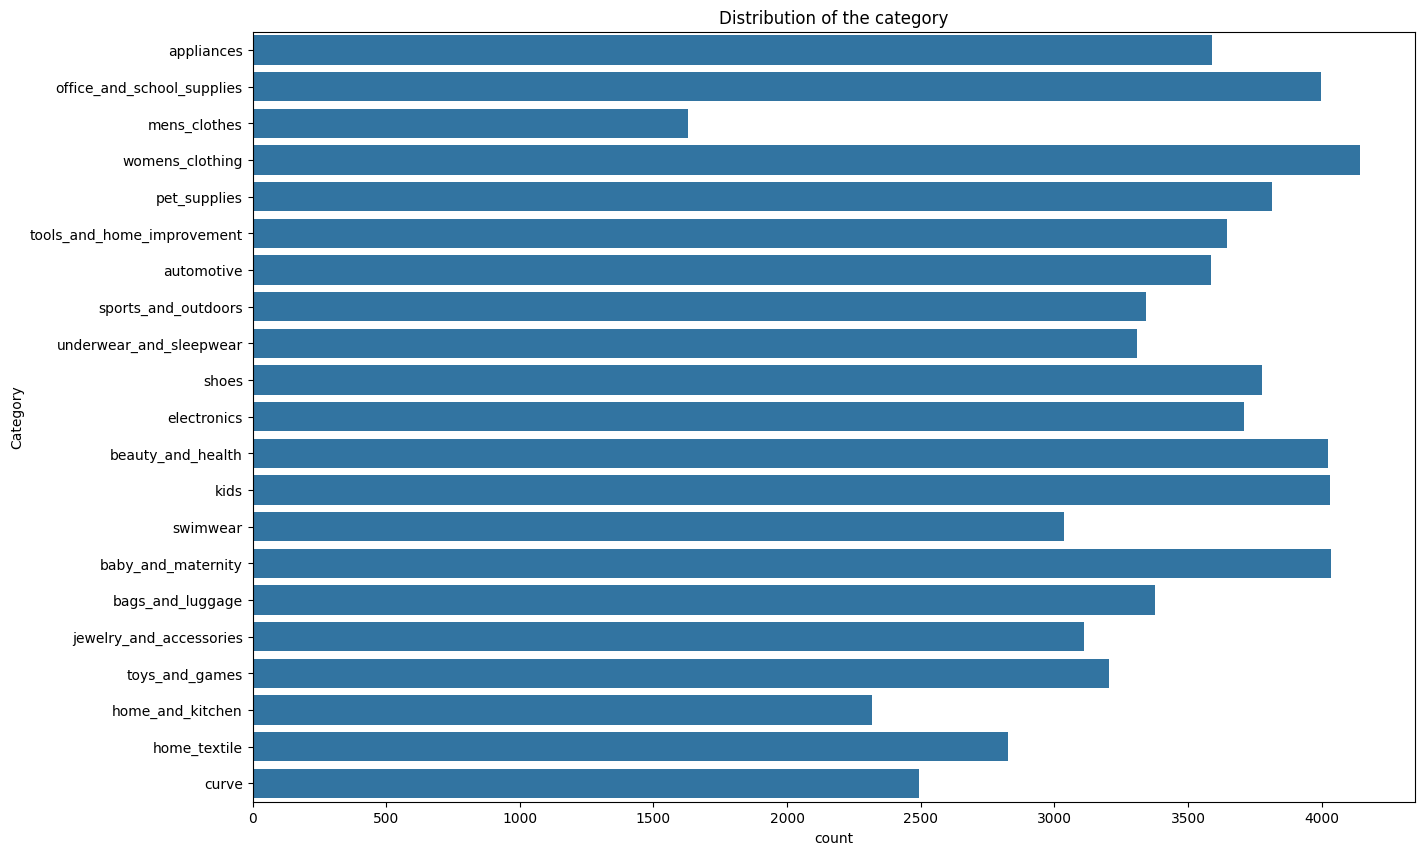

In [121]:
plt.figure(figsize=(15,10))
sns.countplot(y="Category", data=df)
plt.title("Distribution of the category");

In [122]:
gb = df.groupby("Category")["Price"].median().sort_values(ascending=True)

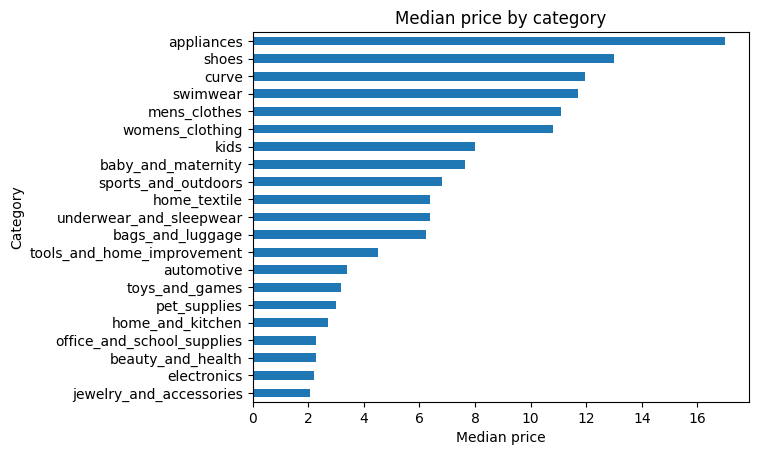

In [123]:
gb.plot(kind='barh')
plt.title("Median price by category")
plt.xlabel("Median price");

In [124]:
gb2 = df.groupby("Category")["Recent_sell"].median().sort_values(ascending=True)

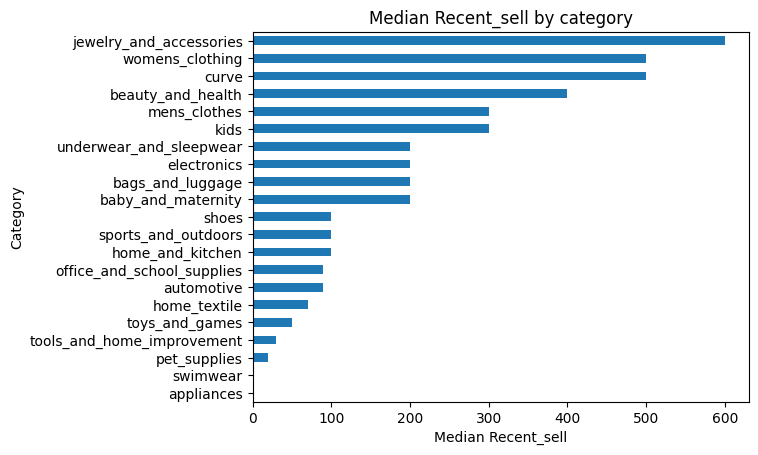

In [125]:
gb2.plot(kind="barh")
plt.title("Median Recent_sell by category")
plt.xlabel("Median Recent_sell");